## <span style="color:#FE8F77;"><strong>Bellabeat Case Study</strong></span>
### <span style="color:#ff5757;">Victoria Shpetnaya</span>
---

### 1. About the company
Bellabeat is a high-tech company that manufactures health-focused smart products. 
They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits.

### 2. Ask
#### 2.1. Questions for the analysis
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### 2.2. Business task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage. 

#### 2.3 Key Stakeholders
* Urška Sršen: cofounder and Chief Creative Officer.
* Sando Mur: cofounder and a key member of the Bellabeat executive team.
* Bellabeat marketing analytics team.

### 3. Prepare
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius, Kaggle) which consists of 18 CVS files. This dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

#### 3.1. Accessibility and privacy of data: 
This dataset is an open-source. [link to Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit)

#### 3.2.Data Credibility and Integrity:
* Sampling bias: the limitation of dataset size of 30 users.
* Not current: this dataset was generated between 12.03.2016 - 12.05.2016.


### 4. Process
To start, let’s set up the environment by opening the necessary libraries for the analysis.


In [2]:
library(tidyverse)
library(lubridate)
library(sqldf)
library(skimr)
library(ggeasy)
library(scales)
library(ggthemes)
library(highcharter)


Warning message:
"пакет 'tibble' был собран под R версии 4.2.3"
Warning message:
"пакет 'dplyr' был собран под R версии 4.2.3"
Warning message:
"пакет 'stringr' был собран под R версии 4.2.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"пакет 'sqldf' был собран под R версии 4.2.3"
Загрузка требуемого пакета: gsubfn

Warning message:
"пакет 'gsubfn' был собран под R версии 4.2.3"
Загрузка требуемого пакета: proto

Warning message:
"пакет 'proto' был собран под R версии 4.2.3"
Загрузка требуемого пак

#### 4.1. Exploring data structure

Importing datasets:


In [3]:
activity <- read.csv('fitbit_data_raw\\dailyActivity_merged.csv')
calories <- read.csv('fitbit_data_raw\\dailyCalories_merged.csv')
intensities <- read.csv('fitbit_data_raw\\dailyIntensities_merged.csv')
daily_steps <- read.csv('fitbit_data_raw\\dailySteps_merged.csv')
hourly_steps <- read.csv('fitbit_data_raw\\hourlySteps_merged.csv')
sleep <- read.csv('fitbit_data_raw\\sleepDay_merged.csv')
weight <- read.csv('fitbit_data_raw\\weightLoginfo_merged.csv')


I have already checked the data in MS Excel. Now using the head(), glimpse() functions I need to make sure that data is transferred correctly.

Based on observation in MS Excel, tables _"calories"_ , _"intensities"_, and _"steps"_
 could be subsets of _"activity"_. 
To check this hypothesis I will run a sql query using package "sqldf" I installed earlier.


In [4]:
sqldf("SELECT COUNT()
      FROM activity 
      INNER JOIN calories ON 
      activity.Id = calories.Id AND 
      activity.ActivityDate = calories.ActivityDay AND 
      activity.Calories = calories.Calories")

sqldf("SELECT COUNT()
      FROM activity 
      INNER JOIN daily_steps  ON 
      activity.Id = daily_steps.Id AND 
      activity.ActivityDate = daily_steps.ActivityDay AND 
      activity.Totalsteps = dailY_steps.StepTotal")

sqldf("SELECT COUNT()
      FROM activity 
      INNER JOIN intensities  ON 
      activity.Id = intensities.Id AND 
      activity.ActivityDate = intensities.ActivityDay AND 
      activity.SedentaryMinutes = intensities.SedentaryMinutes AND
      activity.LightlyActiveMinutes = intensities.LightlyActiveMinutes AND
      activity.FairlyActiveMinutes = intensities.FairlyActiveMinutes AND
      activity.VeryActiveMinutes = intensities.VeryActiveMinutes AND
      activity.SedentaryActiveDistance = intensities.SedentaryActiveDistance AND
      activity.LightActiveDistance = intensities.LightActiveDistance AND
      activity.ModeratelyActiveDistance = intensities.ModeratelyActiveDistance AND
      activity.VeryActiveDistance = intensities.VeryActiveDistance")


COUNT()
<int>
940


COUNT()
<int>
940


COUNT()
<int>
940


 All three queries returned the value of 940 as in _"activity"_ table, which means that my hypothesis was true and I can drop tables _"calories"_, _"intensities"_, and _"steps"_, as the _"activity"_ table already contains that information. 



In [5]:
rm(calories, intensities, daily_steps)


Checking for unique ids of the participants:


In [6]:
n_unique(activity$Id)
n_unique(hourly_steps$Id)
n_unique(sleep$Id)
n_unique(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

The number of unique ids in _"sleep"_ table (24) and _"weight"_ (8) is usually not significant to make any recommendations and conclusions based on this data. But I will keep it for the sake of this practice project.

#### 4.2. Data cleaning
Checking for duplicates in our dataset:


In [7]:
sum(duplicated(activity))
sum(duplicated(hourly_steps))
sum(duplicated(sleep))
sum(duplicated(weight))

[1] 0

[1] 0

[1] 3

[1] 0

Seems like table _"sleep"_ has 3 duplicates, which must be removed before conducting the analysis.


In [8]:
sleep <- unique(sleep)

The tables _"hourly_steps"_, _"sleep"_, and _"weigth"_ have the date column which consists of date and time, which should be separated and renamed, for  _"sleep"_, and _"weigth"_ time column is dropped. For _'activity"_ table date column was converted into the same type and renamed.


In [9]:
activity <- activity %>% 
  rename(Date = ActivityDate) %>% 
  mutate(Date = as.Date(Date, format = "%m/%d/%Y")) #uppercase Y for 4-digit year 

sleep <- sleep %>% 
  rename(Date = SleepDay) %>% 
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))

weight <- weight %>% 
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))

hourly_steps$ActivityHour = as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()) 
# "%I" stands for a 12-hour clock, "%p" - either `AM' or `PM' Uppercase 
hourly_steps$time <- format(hourly_steps$ActivityHour, format = "%H:%M:%S")
hourly_steps$date <- format(hourly_steps$ActivityHour, format = "%m/%d/%Y")


#### 4.3. Data merging
I merged three tables into one by their Ids and dates, the _"hourly_steps"_ is not merged due to time column which is crucial in that case.


In [10]:
final_df <- merge(merge(activity, sleep, by = c('Id', 'Date'), all = TRUE), 
                  weight, by = c('Id', 'Date'), all = TRUE)



Then I removed the columns which I won't be using during my analysis. First I checked the column names, then chose the columns to wor with from my _"final_df"_.


In [11]:
colnames(final_df)
final_df <- final_df %>% 
  select(-c(TrackerDistance, LoggedActivitiesDistance, 
            SedentaryActiveDistance, TotalSleepRecords, WeightPounds, Fat, IsManualReport, LogId))
colnames(final_df)


[1] "Id"                       "Date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "TotalSleepRecords"       
[17] "TotalMinutesAsleep"       "TotalTimeInBed"          
[19] "WeightKg"                 "WeightPounds"            
[21] "Fat"                      "BMI"                     
[23] "IsManualReport"           "LogId"

[1] "Id"                       "Date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [7] "LightActiveDistance"      "VeryActiveMinutes"       
 [9] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[11] "SedentaryMinutes"         "Calories"                
[13] "TotalMinutesAsleep"       "TotalTimeInBed"          
[15] "WeightKg"                 "BMI"

### 5. Analyze
First, I took a look at a summary of my _"final_df"_


In [12]:
final_df %>% 
  select(TotalSteps, Calories,
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes,
         TotalMinutesAsleep, TotalTimeInBed)%>%
  drop_na() %>%
  summary()


   TotalSteps       Calories    VeryActiveMinutes FairlyActiveMinutes
 Min.   :   17   Min.   : 257   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 5189   1st Qu.:1841   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8913   Median :2207   Median :  9.00    Median : 11.00     
 Mean   : 8515   Mean   :2389   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:11370   3rd Qu.:2920   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :22770   Max.   :4900   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes TotalMinutesAsleep TotalTimeInBed 
 Min.   :  2.0        Min.   :   0.0   Min.   : 58.0      Min.   : 61.0  
 1st Qu.:158.0        1st Qu.: 631.2   1st Qu.:361.0      1st Qu.:403.8  
 Median :208.0        Median : 717.0   Median :432.5      Median :463.0  
 Mean   :216.5        Mean   : 712.1   Mean   :419.2      Mean   :458.5  
 3rd Qu.:263.0        3rd Qu.: 782.8   3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :518.0        Max.   :1265.0   Max.   :796.0      Max.   :

Key findings:

* On average, each user takes 8515 steps per day, which can be encouraged by the app to continue with this step rate or not lower 7500 steps. 
There's evidence that an average of approximately 7500 steps per day were associated with steady declines in mortality, beyond which rates leveled. [JAMA Intern Med.](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2734709)

* On average, each user spends 712.1 minutes (~12 hours) per day being inactive. 
There's no evidence of how much sedentary minutes is okay for an adult, but sedentary behavior is strongly correlated with all-cause and CVD mortalities in adults. [National Library of Medicine.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7700832/)

* On average, each user sleeps 419.2 minutes (~7 hours)  per day, which considered normal for the age 18-60 years by [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html).

* On average, users are lightly-active.


#### 5.1. Activity in a week
First I added "weekday" column to the _"final_df"_.


In [13]:
final_df$weekday <- weekdays(final_df$Date, abbreviate = TRUE)
final_df$weekday <- factor(final_df$weekday, labels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")) 


Then created a box plot.


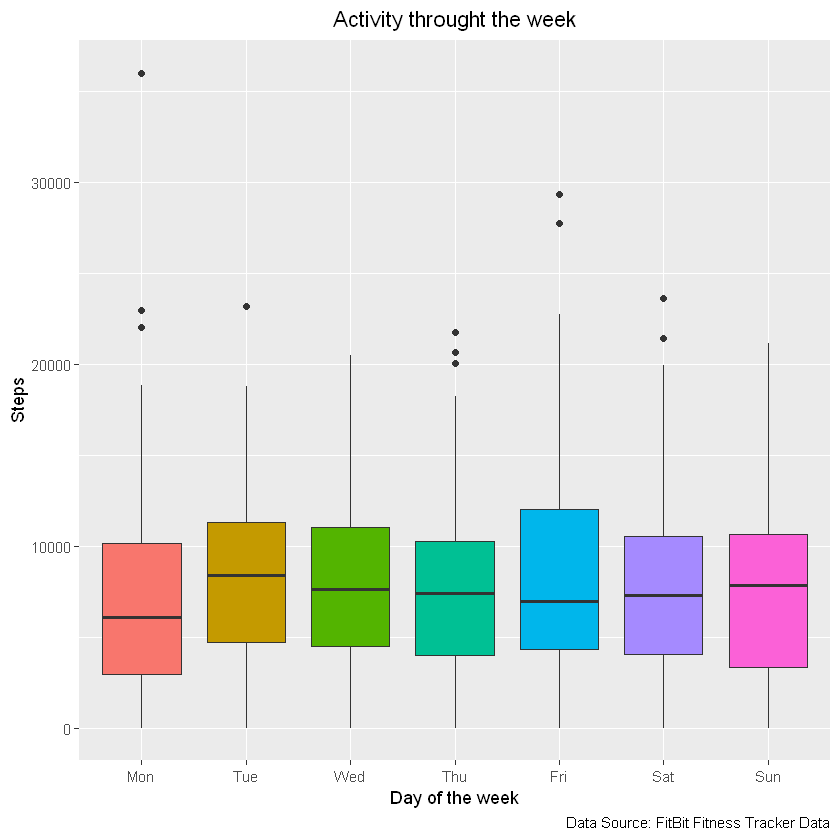

In [15]:
final_df %>% 
  ggplot(aes(x = weekday, y = TotalSteps, fill = weekday)) +
  geom_boxplot() +
  theme(legend.position="none") +
  labs(
    title = "Activity throught the week",
    x = "Day of the week",
    y = "Steps",
    caption = 'Data Source: FitBit Fitness Tracker Data'
  ) +
  ggeasy::easy_center_title()

 
In this box plot, we can see that the difference between days of the week is minimal as well as that activity was slightly lower on Mondays and Thursdays. 

The BellaBeat app may recommend planning activities and walks on these days more often.

#### 5.2. Steps throughout the day
 To see if the users are more active on a certain hours of the day I made the next plot.


In [ ]:
hourly_steps %>%
  group_by(time) %>%
  drop_na(StepTotal) %>% 
  summarise(mean_steps = mean(StepTotal)) %>% 
  hchart("bar", hcaes(x = time, y = mean_steps, color = mean_steps)) %>% 
         #dataLabels = list(enables = TRUE)) %>% 
  hc_tooltip(pointFormat = "{point.y: .0f}") %>% 
  hc_title(text = "Steps throughout the day",
         align = "center") %>%
  hc_subtitle(text = "Users' average number of steps by hour",
              align = "center") %>% 
  hc_credits(
    enabled = TRUE,
    text = "<em>DS: FitBit Fitness Tracker Data</em></span>",
    style = list(fontSize = "10px")) %>% 
  hc_yAxis(title = list(text = "Average Number of Steps")) %>%
  hc_xAxis(title = list(text = "Time of the day")) %>% 
  hc_add_theme(hc_theme_flat()) 


*The interactive vizualisation doesn't show in a jupiter notebook. Please view html file or rmd*

This visualization shows that users are more active from 12:00 to 14:00 and 17:00 to 19:00, which might be due to a lunch break and a walk home from work. The BellaBeat app should remind and motivate users to make breaks for a walk in the morning and after lunch if possible.

#### 5.3. Falling asleep

First I added a column which represents time in bed trying to fall asleep, which might show sleeping problems.Then, I made two plots, which depict how being inactive or active throughout the day may influence falling asleep later.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


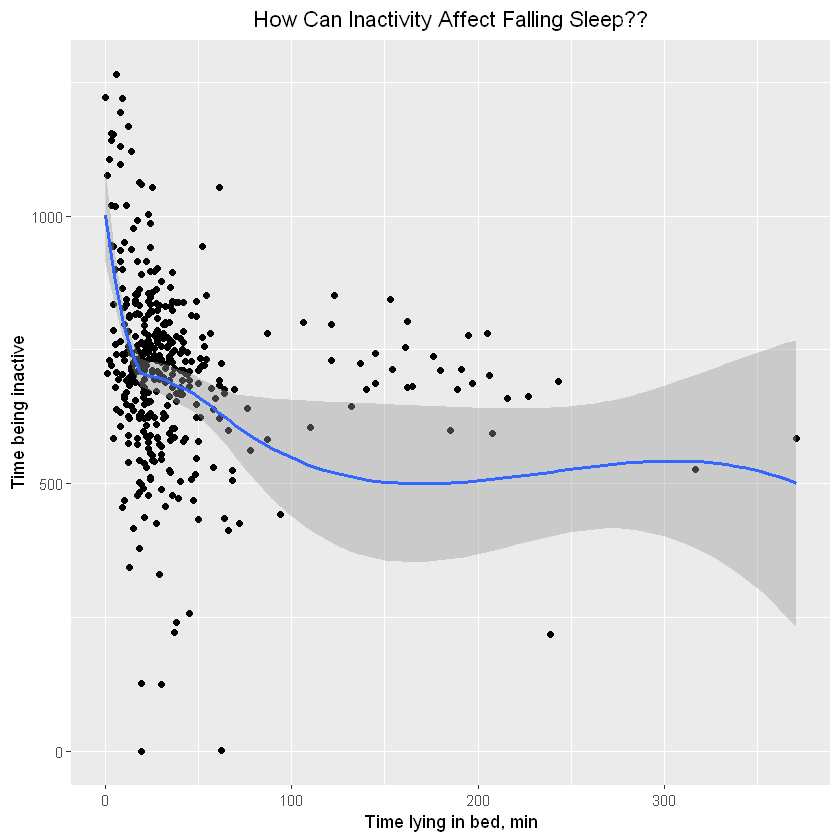

In [17]:
final_df %>%
  mutate(lying_in_bed = TotalTimeInBed - TotalMinutesAsleep) %>% 
  drop_na(SedentaryMinutes, lying_in_bed) %>% 
  ggplot(mapping = aes(x = lying_in_bed, y = SedentaryMinutes)) +
  geom_point() +
  geom_smooth() + 
  labs(
    title = "How Can Inactivity Affect Falling Sleep??", 
    x = "Time lying in bed, min",
    y = "Time being inactive"
    ) +
  ggeasy::easy_center_title()



Then I've decided to check correlation coefficient as looking at the plot it wasn't clear enough.


In [20]:
final_df$lying_in_bed <- final_df$TotalTimeInBed - final_df$TotalMinutesAsleep
cor(final_df$lying_in_bed, final_df$SedentaryMinutes, use = "complete.obs")


[1] -0.1658941

Correlation coefficient confirmed a weak negative correlation, but it might be due to a small dataset of sleeping patterns, which I confirmed earlier.



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


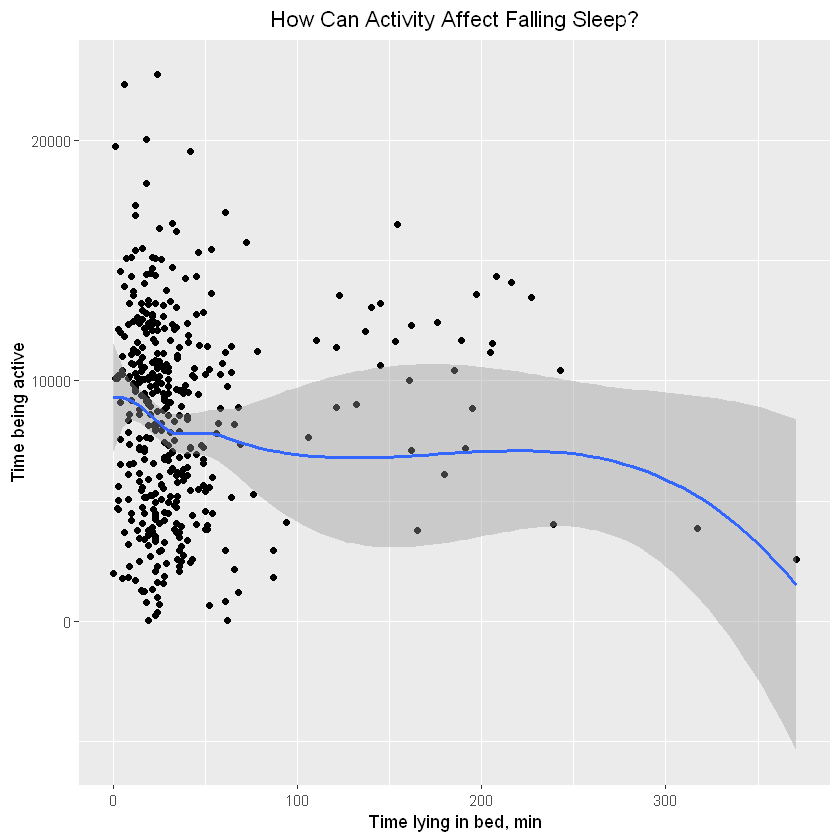

In [18]:
final_df %>%
  mutate(lying_in_bed = TotalTimeInBed - TotalMinutesAsleep) %>% 
  drop_na(TotalSteps, lying_in_bed) %>% 
  ggplot(mapping = aes(x = lying_in_bed, y = TotalSteps)) +
  geom_point() +
  geom_smooth() +
  labs(
    title = "How Can Activity Affect Falling Sleep?", 
    x = "Time lying in bed, min",
    y = "Time being active"
  ) +
  ggeasy::easy_center_title()


In [21]:
cor(final_df$lying_in_bed, final_df$TotalSteps, use = "complete.obs")

[1] 0.02985402

Both plots show that being active or inactive throughout the day can't help falling asleep faster. This problem may be due to insomnia, stress and should be investigated further if needed.

#### 5.4. Physical Activity Distribution of Users

To detect what types of physical activities users have I made the next pie-chart which represents activity distribution.


In [ ]:
final_df %>% 
  select(VeryActiveMinutes, 
         FairlyActiveMinutes, 
         LightlyActiveMinutes, 
         SedentaryMinutes) %>% 
  summarise(across(everything(), list(sum))) %>% 
  gather(active_level, minutes) %>% 
  mutate(active_level = factor(active_level, 
                               labels = c('Fairly Active','Lightly Active',
                                          'Sedentary','Heavly Active'))) %>% 
  hchart("pie", hcaes(x = active_level, y = minutes),
         dataLabels = list(enabled = TRUE, 
                           format = "{point.name}: {point.percentage:,.1f} %",
                           style = list(
                             fontSize = "14px"))) %>% 
  hc_title(text = "Activity distribution",
           align = "center") %>%
  hc_subtitle(text = "Users' activity based on active minutes",
              align = "center") %>% 
  hc_credits(
      enabled = TRUE,
      text = "<em>DS: FitBit Fitness Tracker Data</em></span>",
      style = list(fontSize = "10px")) %>% 
  hc_add_theme(hc_theme_538()) 


*The interactive vizualisation doesn't show in a jupiter notebook. Please view html file or rmd*

The pie-chart illustrates that the most common level of activity during being active is light, as I have discovered before by summary.
And the majority of users (81.3%) lead sedentary lifestyle, which means that the stakeholders have to focus on these type of users and how to help that become at least "lightly active".


#### 5.5. Frequency Of User Activity

Then I decided to define users type by how many days they had used the tracker throughout the month. I specified 3 user types which I described below.


In [23]:
usage_df <- final_df %>%
  group_by(Id) %>%
  summarise(use_days = sum(n())) %>%
  mutate(use_type = case_when(
    use_days >= 1 & use_days <= 10 ~ "Low (> 10 days)",
    use_days >= 11 & use_days <=20 ~ "Medium (11-20 days)",
    use_days >= 21 & use_days <= 31 ~ "High (< 21 days)"))  #defined user_type


In [ ]:
usage_df%>%  
  select(use_type, use_days) %>% 
  group_by(use_type) %>% 
  summarise(use_count = n()) %>%
  hchart("pie", hcaes(x = use_type, y = use_count), 
         dataLabels = list(enabled = TRUE,
                           format = "{point.use_type} : {point.percentage:,.1f}%",
                           style = list(
                             fontSize = "14px"))) %>%
  hc_tooltip(pointFormat = "<b>Percentage</b> {point.percentage:,.2f}%") %>% 
  hc_title(text = "Frequency Of User Activity",
           align = "center") %>%
  hc_subtitle(text = "The total number of days that users were active in a month ",
              align = "center") %>% 
  hc_credits(
    enabled = TRUE,
    text = "<em>DS: FitBit Fitness Tracker Data</em></span>",
    style = list(fontSize = "10px"))


*The interactive vizualisation doesn't show in a jupiter notebook. Please view html file or rmd*

This pie-cart shows that the majority of users had been using the tracker for above 21 days, which represents good engagement of using tracker, but I decided to investigate further as "using a tracker" can be just for an hour and not representative.

##### 5.6. Daily Usage of a Tracker


In [25]:
h_step_trend <- hourly_steps %>%
  group_by(date) %>%
  summarise(average_hr = round((n()/33),2)) %>% 
  mutate(date = mdy(date))
head(h_step_trend)


date,average_hr
<date>,<dbl>
2016-04-12,24.00
2016-04-13,24.00
2016-04-14,24.00
2016-04-15,23.76
2016-04-16,23.27
2016-04-17,23.27


In [ ]:
h_step_trend %>%  
  group_by(date) %>% 
  hchart("line", hcaes(x = date, y = average_hr)) %>% 
  hc_tooltip(pointFormat = "<b>Average usage in a day</b> {point.y}") %>% 
  hc_title(text = "Daily Usage of a Tracker",
           align = "center") %>%
  hc_subtitle(text = "How users wore a 'fitbit tracker' throughout a month per day",
              align = "center") %>% 
  hc_yAxis(title = list(text = 'Worn hours per day'),
           showFirstLabel = TRUE,
           max = 24,
           min = 0,
           tickInterval = 4) %>% 
  hc_xAxis(title = list(text = "")) %>% 
  hc_credits(
    enabled = TRUE,
    text = "<em>DS: FitBit Fitness Tracker Data</em></span>",
    style = list(fontSize = "10px")) %>% 
  hc_add_theme(hc_theme_flat())


*The interactive vizualisation doesn't show in a jupiter notebook. Please view html file or rmd*

This descending line indicates that users wore the tracker full day at first, maintained a average wearing time of 23 hours a day, and then gradually decrease after 2 weeks (April 28th) and then significantly dropped by May 12th to 8 hours a day.



### 6. Share and Act
 
1. On average, each user takes 8515 steps per day, which can be encouraged by the app to continue with this step rate or not lower 7500 steps per day **with notification if the total steps in a day are lower then 7500 by 19:00**.
There's evidence that an average of approximately 7500 steps per day were associated with steady declines in mortality, beyond which rates leveled. [JAMA Intern Med.](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2734709)

2. On average, each user spends 712.1 minutes (~12 hours) per day being inactive and it is the majority of users (81.3%), which means that **the stakeholders have to focus on these type of users and how to help that become at least "lightly active" with fitness plans, podcast for a walk, award system.**
There's no evidence of how much sedentary minutes is okay for an adult, but sedentary behavior is strongly correlated with all-cause and CVD mortalities in adults. [National Library of Medicine.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7700832/)

 
3. Users are lightly-active if being active, more active from 12:00 to 14:00 and 17:00 to 19:00 (which might be due to a lunch break and a walk home from work), and activity was slightly lower on Mondays and Thursdays. 
**The BellaBeat App may recommend planning activities  and walks ahead on these days more often and might remind and motivate users to make breaks for a walk in the morning and after lunch if possible. The App might send alerts to encourage activity if user remain seated or inactive longer than a certain period of time (awarding system).**

4. On average, each user sleeps 419.2 minutes (~7 hours)  per day, which considered normal for the age 18-60 years by [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html). Also being physically active or inactive throughout the day can't help with falling asleep faster. This problem may be due to insomnia, stress and should be investigated further if needed.


5. Mostly users had been using the tracker for above 21 days, but users wore the tracker full day at first, maintained a average wearing time of 23 hours a day, and then gradually decrease after 2 weeks (April 28th) and then significantly dropped by May 12th to 8 hours a day. 
**The stakeholders should take into consideration users' engagement activities of continuous usage (in-app chats, mini-games, discounts, coupons, monthly-plans, award system, etc.) as well as sending notifications at a certain time for users to remain consistent throughout the day and the week. This may help creating a sense of reward and thus increase retention rate.**
